In [1]:
dataset_path = '/content/drive/MyDrive/Project 3'
import os

total_images, total_labels = 0, 0

for split in ['train', 'valid', 'test']:
    img_dir = os.path.join(dataset_path, split, 'images')
    lbl_dir = os.path.join(dataset_path, split, 'labels')

    num_images = len(os.listdir(img_dir))
    num_labels = len(os.listdir(lbl_dir))

    total_images += num_images
    total_labels += num_labels

    print(f"{split.upper()} SET -> Images: {num_images}, Labels: {num_labels}")

print(f"\nTOTAL IMAGES: {total_images}, TOTAL LABEL FILES: {total_labels}")


TRAIN SET -> Images: 3946, Labels: 3946
VALID SET -> Images: 493, Labels: 493
TEST SET -> Images: 494, Labels: 494

TOTAL IMAGES: 4933, TOTAL LABEL FILES: 4933


In [13]:
from collections import Counter

class_counts = Counter()

for split in ['train', 'valid', 'test']:
    lbl_dir = os.path.join(dataset_path, split, 'labels')
    for file in os.listdir(lbl_dir):
        with open(os.path.join(lbl_dir, file), 'r') as f:
            for line in f:
                class_id = int(line.strip().split()[0])
                class_counts[class_id] += 1

# Print class count
print("\nClass Distribution:")
for cls_id, count in sorted(class_counts.items()):
    print(f"Class {cls_id}: {count} instances")



Class Distribution:
Class 0: 282 instances
Class 1: 280 instances
Class 2: 624 instances
Class 3: 472 instances
Class 4: 384 instances
Class 5: 649 instances
Class 6: 752 instances
Class 7: 301 instances
Class 8: 336 instances
Class 9: 194 instances
Class 10: 363 instances
Class 11: 834 instances
Class 12: 848 instances
Class 13: 384 instances
Class 14: 288 instances
Class 15: 359 instances
Class 16: 392 instances
Class 17: 275 instances
Class 18: 532 instances
Class 19: 620 instances
Class 20: 284 instances
Class 21: 607 instances
Class 22: 393 instances
Class 23: 420 instances
Class 24: 735 instances


<ipython-input-16-298cc6275713>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='Class', y='Count', palette='viridis')


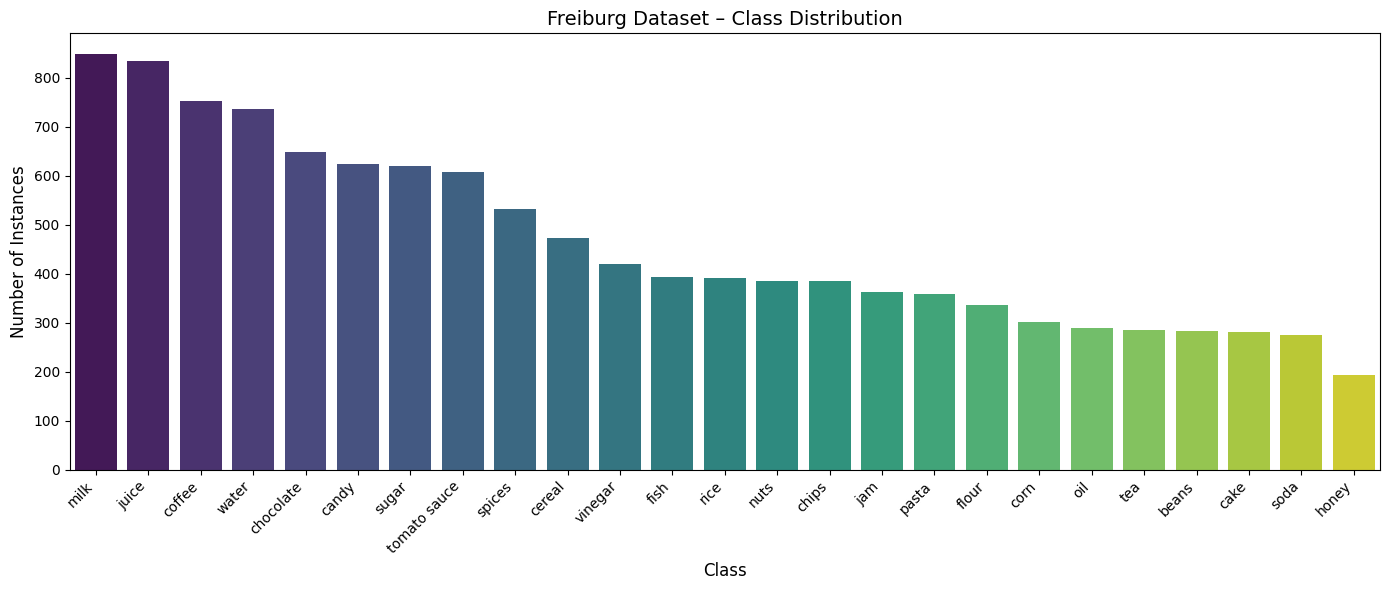

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Correct class names from Freiburg Groceries Dataset
class_names = [
    "beans", "cake", "candy", "cereal", "chips", "chocolate", "coffee", "corn",
    "flour", "honey", "jam", "juice", "milk", "nuts", "oil", "pasta", "rice",
    "soda", "spices", "sugar", "tea", "tomato sauce", "fish", "vinegar", "water"
]

# Build DataFrame from your class_counts dictionary
ids = list(class_counts.keys())
counts = list(class_counts.values())
labels = [class_names[i] for i in ids]  # map class IDs to class names

df = pd.DataFrame({'Class': labels, 'Count': counts})

# Sort by count descending
df_sorted = df.sort_values(by='Count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(14, 6))
sns.barplot(data=df_sorted, x='Class', y='Count', palette='viridis')
plt.title("Freiburg Dataset – Class Distribution", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Instances", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



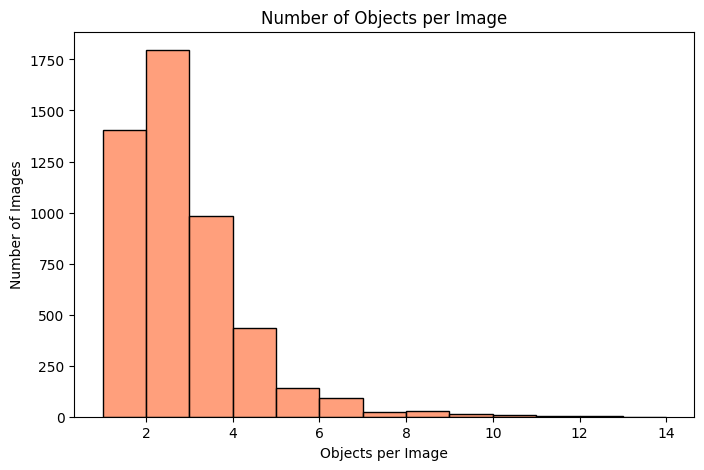

Average objects per image: 2.35
Max objects in one image: 13


In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

object_counts = []

for split in ['train', 'valid', 'test']:
    lbl_dir = os.path.join(dataset_path, split, 'labels')
    for file in os.listdir(lbl_dir):
        with open(os.path.join(lbl_dir, file), 'r') as f:
            lines = f.readlines()
            object_counts.append(len(lines))

plt.figure(figsize=(8, 5))
sns.histplot(object_counts, bins=range(1, max(object_counts)+2), color='coral', kde=False)
plt.title('Number of Objects per Image')
plt.xlabel('Objects per Image')
plt.ylabel('Number of Images')

plt.show()

print(f"Average objects per image: {np.mean(object_counts):.2f}")
print(f"Max objects in one image: {np.max(object_counts)}")
